In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso


In [3]:
df=pd.read_csv('house_rental_data.csv.txt',index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
df.shape

(645, 7)

In [6]:
df.drop_duplicates()
df.shape

(645, 7)

In [7]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


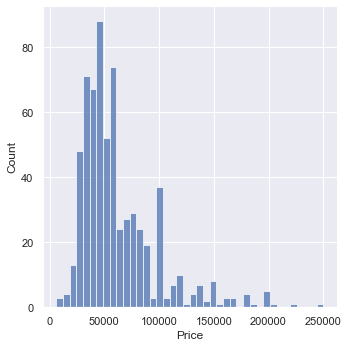

In [8]:
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(df['Price'],bins=40)

c:\Users\91805\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sqft', ylabel='Density'>

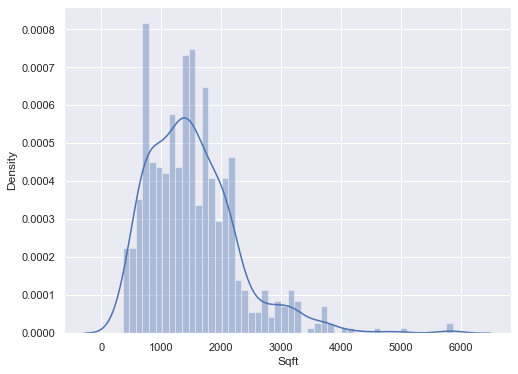

In [9]:
sns.set(rc={'figure.figsize':(8,6)})
sns.distplot(df['Sqft'],bins=50)

In [10]:
df.drop(df.index[list((np.where(df['Price']>150000)))],inplace=True)
df.drop(df.index[list((np.where(df['Sqft']>4000)))],inplace=True)
df.drop(df.index[list((np.where(df['Price']<20000)))],inplace=True)

df.shape


c:\Users\91805\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


(617, 7)

In [11]:
#Multiple Linear regression model

In [21]:
scaler=StandardScaler()
x=scaler.fit_transform(df.drop('Price',axis=1))
y=df['Price']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)


In [23]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [24]:
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("rmse", rmse)
print('r2',r2)

rmse 16096.019244954226
r2 0.6580447610534632


In [25]:
train_score=model.score(x_train,y_train)
test_score=model.score(x_test,y_test)
print(train_score)
print(test_score)

0.5813345049899592
0.6580447610534632


In [26]:
# L1 model

In [27]:
lasso003=Lasso(alpha=0.03)  #alpha=lambda(tuning parameter)
lasso003.fit(x_train,y_train)

#training and testing score
train_score=lasso003.score(x_train,y_train)
test_score=lasso003.score(x_test,y_test)
coeff_used=np.sum(lasso003.coef_ !=0)
print(train_score)
print(test_score)
print(coeff_used)

0.5813345049832999
0.6580448937794878
6


In [28]:
# Simple Linear regression model

In [29]:
a=scaler.fit_transform(df[['Sqft','Price']])
x=a[:,0:1]
y=a[:,1]

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print("rmse", rmse)
print('r2',r2)

rmse 0.5733712870812235
r2 0.6689191152640999


In [31]:
a.shape

(617, 2)